In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
data = pd.read_csv('../Tables/learn_data_final.csv') #load data



data.rename(columns = {'ndvi':'NDVI', 'lst':'LST', 
                              'dist_coast':'DIST_COAST', 
                       'elevation':'ELEVATION','x':'X','y':'Y',
                       'doy':'DOY','year':'Year',
                      'building surface': 'BUILDING SURFACE','impervious surface':'IMPERVIOUS SURFACE',
                       'pervious surface':'PERVIOUS SURFACE'}, inplace = True) 
data.head(10) #visualize first ten records

,GRD_INSPIR,NDVI,LST,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,ELEVATION,DIST_COAST,X,Y,DOY,Year,BUILDING SURFACE,IMPERVIOUS SURFACE,PERVIOUS SURFACE,BUILT_UP
0,1kmN6492E0610,0.677568,29.92,0.5050,0.0000,0.0000,0.0000,0.0000,17.64,0.0000,...,47.633891,80540.409500,610500.0,6492500.0,226,2010,0.0000,0.0000,100.0000,0.0000
1,1kmN6588E0714,0.847841,22.19,0.0150,0.4875,0.0000,3.0450,0.0000,0.00,0.0025,...,30.707187,1384.763052,714500.0,6588500.0,188,2010,0.2025,2.9700,96.8275,0.2025
2,1kmN6428E0668,0.776277,28.23,0.9725,0.0000,0.0000,0.0375,0.0000,0.00,0.0000,...,130.712827,137763.341200,668500.0,6428500.0,199,2010,0.0200,0.3650,99.6150,0.0200
3,1kmN6434E0633,0.803441,29.69,0.1250,0.1650,0.0000,0.3525,0.0000,0.00,0.0000,...,144.721258,102391.365700,633500.0,6434500.0,220,2010,0.0375,1.4975,98.4650,0.0375
4,1kmN6536E0458,0.722252,28.41,21.3300,0.0000,0.0000,16.6800,0.0000,0.00,0.0000,...,1.930039,0.000000,458500.0,6536500.0,194,2010,0.0000,0.0000,100.0000,0.0000
5,1kmN6473E0612,0.759836,24.35,0.1825,0.8750,0.0000,0.0050,0.0000,0.00,0.0000,...,39.817499,78148.426560,612500.0,6473500.0,222,2010,0.2375,3.4525,96.3100,0.2375
6,1kmN6441E0595,0.835678,19.77,0.0225,0.0000,0.0000,1.4675,0.0000,0.00,0.0000,...,93.667815,63998.267430,595500.0,6441500.0,221,2010,0.1500,1.7250,98.1250,0.1500
7,1kmN6535E0530,0.713367,25.33,0.3375,0.0000,0.0000,0.7650,0.0000,0.00,0.0000,...,45.098421,42200.140230,530500.0,6535500.0,210,2010,0.2375,1.4875,98.2750,0.2375
8,1kmN6475E0614,0.859155,27.25,0.1075,0.0000,0.0000,3.5800,0.0000,0.00,0.0000,...,35.858296,80394.012760,614500.0,6475500.0,199,2010,0.1625,2.1350,97.7025,0.1625
9,1kmN6521E0583,0.746326,24.60,2.2725,4.0550,5.7925,2.6025,0.0825,0.00,6.1525,...,58.391305,73073.370660,583500.0,6521500.0,197,2010,2.8625,18.4425,78.6950,2.8625


In [3]:
v_data = pd.read_csv('../Tables/validation data.csv')

v_data=v_data.drop(columns=['Unnamed: 0'])


v_data.rename(columns = {'ndvi':'NDVI', 'lst':'LST', 
                              'dist_coast':'DIST_COAST', 
                       'elevation':'ELEVATION','x':'X','y':'Y',
                       'doy':'DOY','year':'Year',
                      'building surface': 'BUILDING SURFACE','impervious surface':'IMPERVIOUS SURFACE',
                       'pervious surface':'PERVIOUS SURFACE'}, inplace = True) 

v_data.head(10) #visualize first ten records

,GRD_INSPIR,NDVI,LST,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,ELEVATION,DIST_COAST,X,Y,DOY,Year,BUILDING SURFACE,IMPERVIOUS SURFACE,PERVIOUS SURFACE,BUILT_UP
0,1kmN6451E0396,0.828356,24.430000,0.5750,0.0000,0.0,3.0350,0.0,0.00,0.0,...,6.257829,946.214040,396500.0,6451500.0,209,2010,0.1325,1.4175,97.8750,0.1325
1,1kmN6464E0411,0.683544,25.510000,0.0000,0.0000,0.0,0.2125,0.0,0.00,0.0,...,6.960634,6505.505554,411500.0,6464500.0,209,2010,0.1100,1.5875,98.3025,0.1100
2,1kmN6479E0416,0.705298,24.010000,0.0000,0.0000,0.0,0.0000,0.0,0.00,0.0,...,19.904335,14576.089040,416500.0,6479500.0,209,2010,0.0000,0.0000,100.0000,0.0000
3,1kmN6518E0432,0.813674,21.629999,0.0175,0.4525,0.0,0.3900,0.0,0.00,0.0,...,3.566434,612.353132,432500.0,6518500.0,209,2010,0.1925,3.7425,96.0475,0.1925
4,1kmN6477E0494,0.840233,23.920000,0.0000,0.0000,0.0,0.3850,0.0,0.00,0.0,...,35.581925,8897.833079,494500.0,6477500.0,209,2010,0.0000,0.0000,100.0000,0.0000
5,1kmN6491E0490,0.768595,28.490000,0.1975,0.4075,0.0,0.3425,0.0,0.00,0.0,...,16.831009,9186.895222,490500.0,6491500.0,209,2010,0.0000,0.4075,99.3950,0.0000
6,1kmN6552E0481,0.744521,27.709999,0.0000,0.0000,0.0,0.0000,0.0,0.00,0.0,...,18.274882,7330.853458,481500.0,6552500.0,209,2010,0.0000,0.0000,100.0000,0.0000
7,1kmN6493E0496,0.777658,25.700001,1.5575,0.0000,0.0,0.0000,0.0,0.00,0.0,...,15.526729,15461.206430,496500.0,6493500.0,209,2010,0.0000,0.0000,98.4425,0.0000
8,1kmN6546E0482,0.748983,23.150000,2.0725,0.0000,0.0,0.0000,0.0,74.64,0.0,...,12.673437,6532.811822,482500.0,6546500.0,209,2010,0.0000,0.0000,97.9275,0.0000
9,1kmN6541E0483,0.758305,17.549999,0.0450,0.1025,0.0,6.5050,0.0,0.00,0.0,...,16.029125,3506.255628,483500.0,6541500.0,209,2010,0.1850,2.9950,96.7750,0.1850


In [4]:
v_data.isin(data).all().all()



False

In [5]:
#surface types
#model with both impervious and pervious surfaces

X=data[['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE','NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year'
]] #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4

print('Training data size :',len(X_train))

print('Test data size :',len(X_test))

Training data size : 980877
Test data size : 653919


In [7]:

#model

rf = RandomForestRegressor(criterion='mse',max_depth=50,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=2000,n_jobs=-1)

model = rf.fit(X_train,y_train)

predictions_test = model_2.predict(X_test)
predictions_train = model_2.predict(X_train)

print('\n''rmse_train rf : ', np.sqrt(mean_squared_error(y_train, predictions_train)))

print('\n''rmse_test rf : ', np.sqrt(mean_squared_error(y_test, predictions_test)))

#Dump the model
with open('lst_model_1k.pickle','wb') as modelFile:
     pickle.dump(model,modelFile)




rmse_train rf :  0.9297561463565787

rmse_test rf :  1.3663892281919048


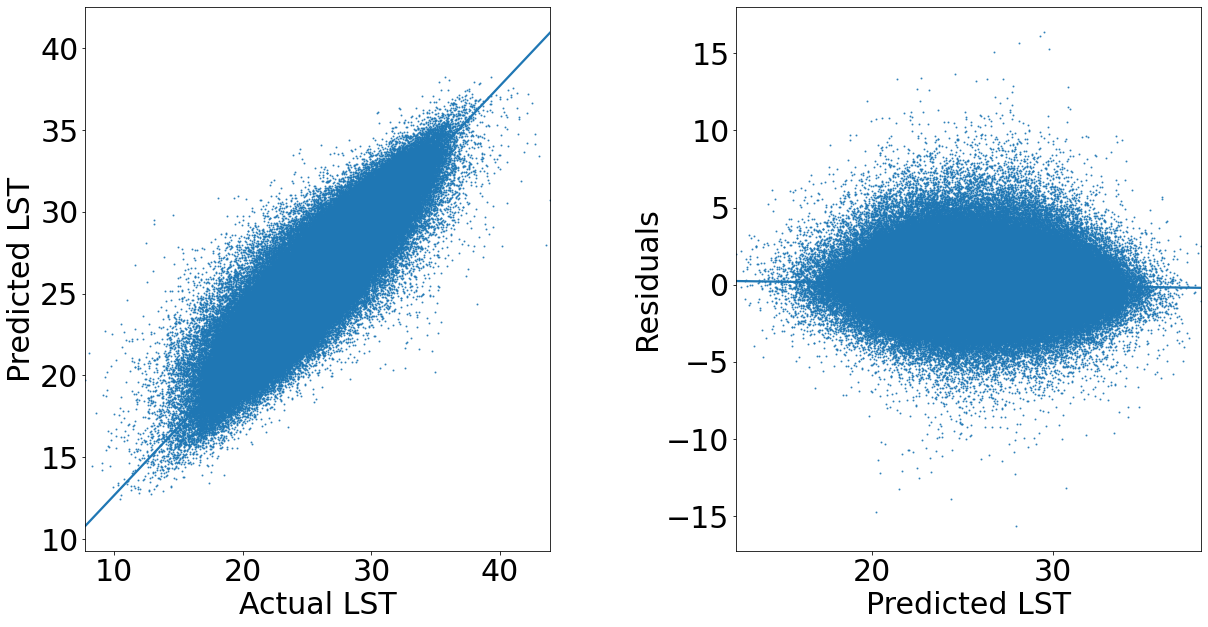

In [8]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.rcParams['axes.labelsize'] =30


f, axes = plt.subplots(1, 2, figsize=(20,10))

axa=sns.regplot(x=y_test,y=predictions_test,scatter_kws={'s':1},ax=axes[0])
axa.set(xlabel='Actual LST', ylabel='Predicted LST')


ax1=sns.regplot(x=predictions_test,y=predictions_test-y_test,scatter_kws={'s':1},ax=axes[1])
ax1.set(xlabel='Predicted LST', ylabel='Residuals')

f.subplots_adjust(wspace=0.4, hspace=0.3)

Feature:WATER Score: 0.023
Feature:BUILDING SURFACE Score: 0.007
Feature:IMPERVIOUS SURFACE Score: 0.006
Feature:PERVIOUS SURFACE Score: 0.005
Feature:NDVI Score: 0.108
Feature:X Score: 0.093
Feature:Y Score: 0.062
Feature:ELEVATION Score: 0.031
Feature:DIST_COAST Score: 0.056
Feature:DOY Score: 0.507
Feature:Year Score: 0.102


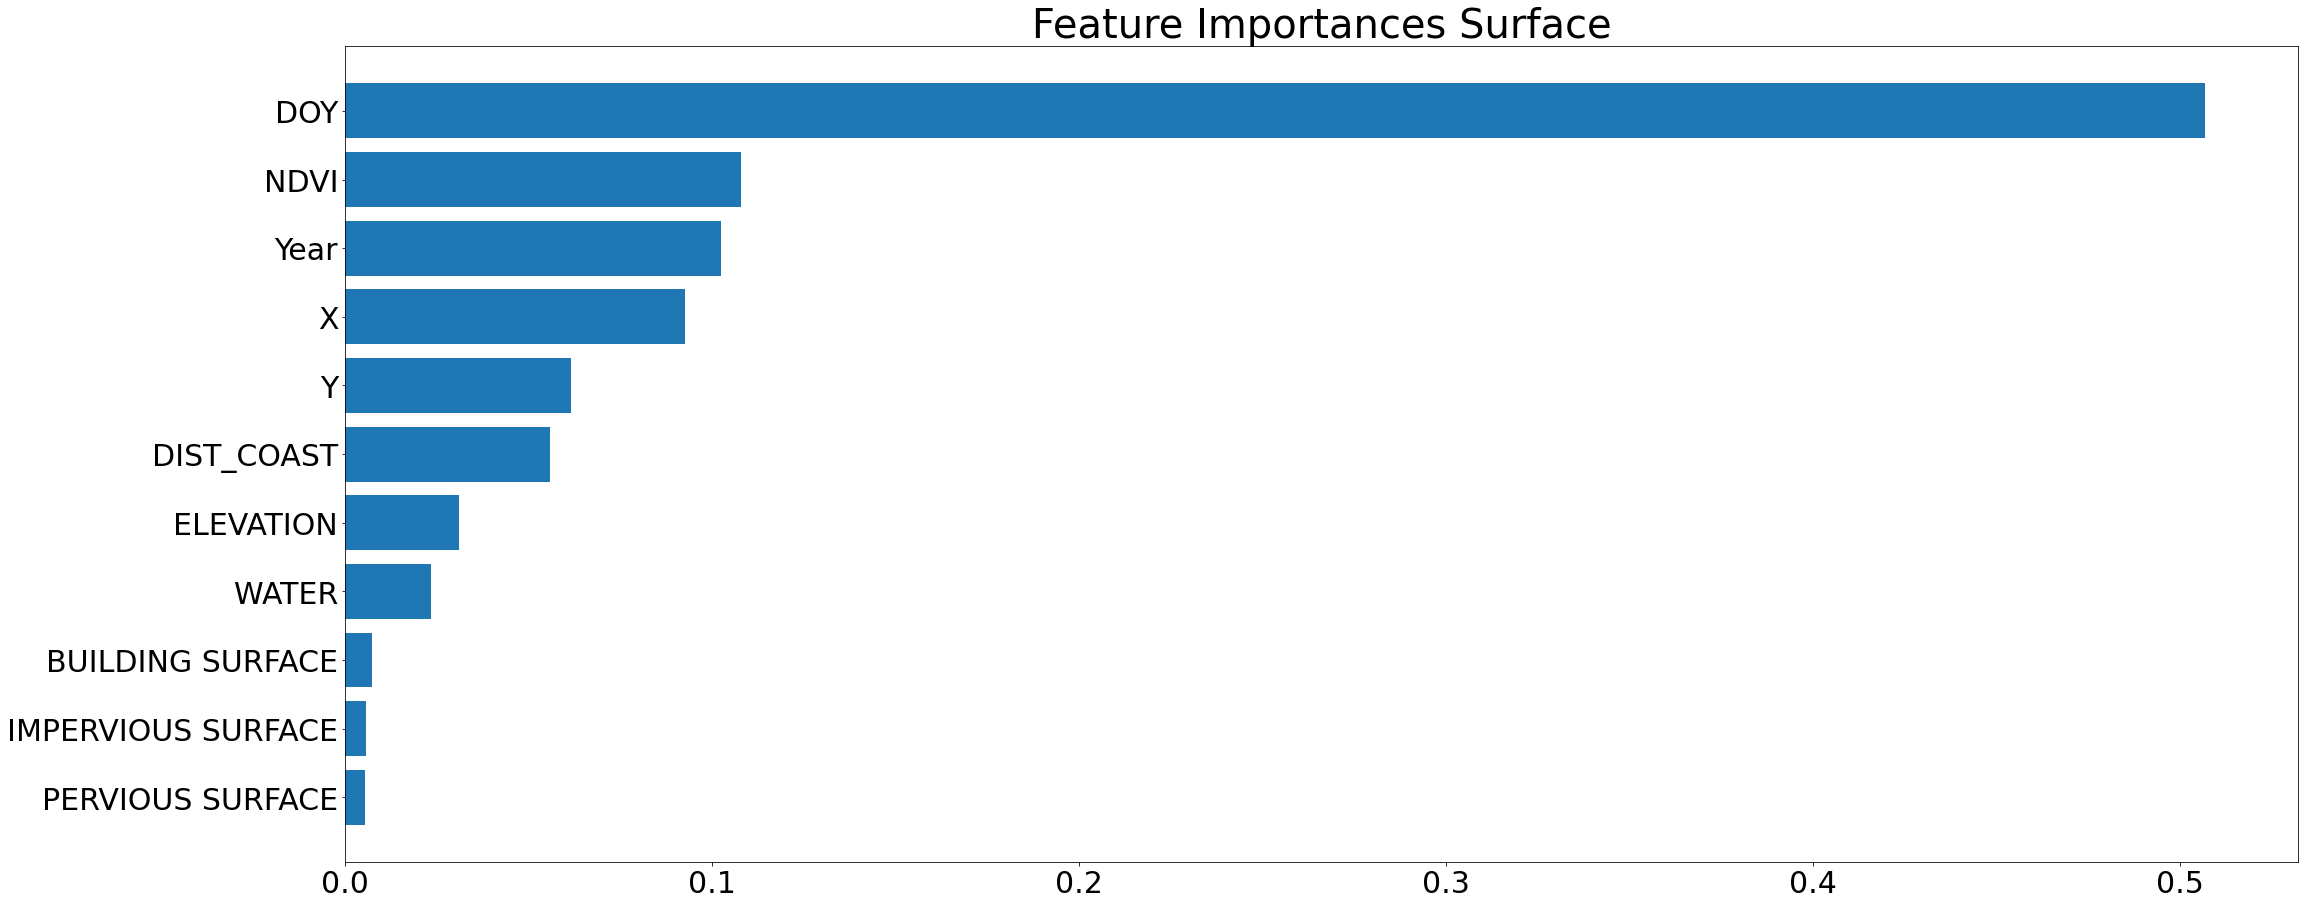

In [36]:
#result = permutation_importance(model_2, X_train_a, y_train, n_repeats=5,
#                              random_state=42)
#perm_sorted_idx = result.importances_mean.argsort()

#tree_importance_sorted_idx = np.argsort(model_2.feature_importances_)
#tree_indices = np.arange(0, len(model_2.feature_importances_)) + 0.5
for i, v in enumerate (model.feature_importances_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.3f'%v))
    

plt.rcParams['figure.figsize'] = [35, 15]
kwargs = {"size":20}

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Surface',fontsize=40)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance',fontsize=20)
plt.tick_params(labelsize=30)
plt.savefig('Feature importance_surfaces_samp.png',format='png')
plt.show()




In [10]:
print('R_sq: ',model.score(X_train,y_train))

print('R_sq: ',model.score(X_test,y_test))

R_sq:  0.9301763645957036
R_sq:  0.8496021248290127


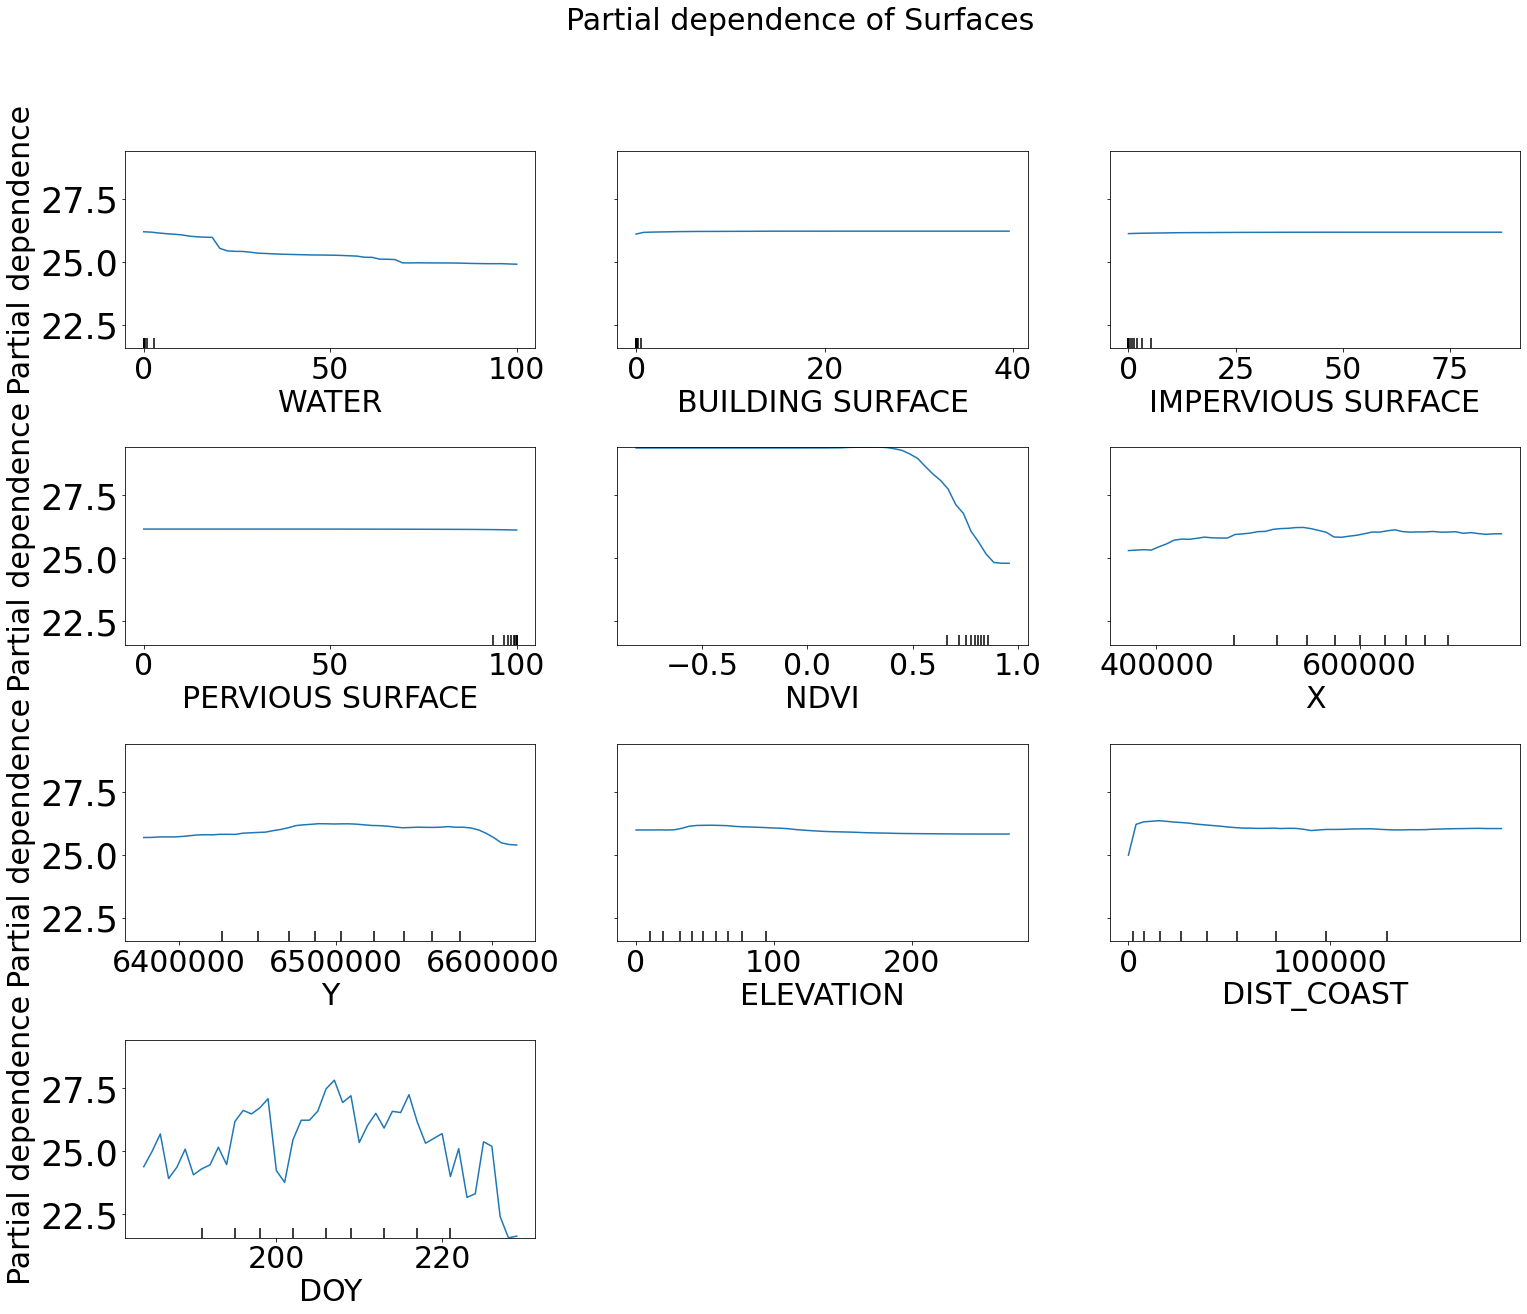

In [11]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence



plt.rcParams['figure.figsize'] = [25, 20]
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=35
plt.rcParams['axes.labelsize'] =30
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams["axes.formatter.limits"] = [-5, 8]

feature_names = ['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE','NDVI',
                 'X','Y','ELEVATION','DIST_COAST','DOY']

#feature_cols = X[feature_names].valuesl

plot_partial_dependence(model,
                         features=feature_names, # column numbers of plots we want to show
                         X=X,            # raw predictors data.
                         percentiles=(0, 1),grid_resolution=50
                         )

fig = plt.gcf()
fig.suptitle('Partial dependence of Surfaces',fontsize=30)
fig.subplots_adjust(wspace=0.2, hspace=0.5)




##################################predictic lst for gaps###################################################################

In [12]:
data_2 = pd.read_csv('../Tables/to_pred_final.csv')

In [13]:
data_2.head(10) #visualize first ten records



,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6465E0369,0.238411,NaN,94.3425,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.127982,0.0,369500.0,6465500.0,184,2010,0.0,2.2250,97.7750,0.0
1,1kmN6466E0369,0.238411,NaN,94.0625,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.729734,0.0,369500.0,6466500.0,184,2010,0.0,3.8900,96.1100,0.0
2,1kmN6467E0369,0.238411,NaN,94.0600,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.869551,0.0,369500.0,6467500.0,184,2010,0.0,2.2150,97.7850,0.0
3,1kmN6468E0369,0.238411,NaN,75.0700,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.869971,0.0,369500.0,6468500.0,184,2010,0.0,3.0025,96.9975,0.0
4,1kmN6465E0370,0.238411,NaN,98.2525,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.171496,0.0,370500.0,6465500.0,184,2010,0.0,0.8550,99.1450,0.0
5,1kmN6466E0370,0.238411,NaN,81.3475,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.704432,0.0,370500.0,6466500.0,184,2010,0.0,3.0650,96.9350,0.0
6,1kmN6467E0370,0.238411,NaN,62.8625,0.0,0.0,0.5325,0.0,0.0,0.0,...,1.334018,0.0,370500.0,6467500.0,184,2010,0.0,1.9900,98.0100,0.0
7,1kmN6468E0370,0.238411,NaN,63.7775,0.0,0.0,0.8000,0.0,0.0,0.0,...,2.088132,0.0,370500.0,6468500.0,184,2010,0.0,1.9550,98.0450,0.0
8,1kmN6462E0371,0.525000,NaN,99.3225,0.0,0.0,0.4850,0.0,0.0,0.0,...,1.125952,0.0,371500.0,6462500.0,184,2010,0.0,0.0000,100.0000,0.0
9,1kmN6467E0371,0.238411,NaN,79.7750,0.0,0.0,0.3150,0.0,0.0,0.0,...,0.870239,0.0,371500.0,6467500.0,184,2010,0.0,2.4825,97.5175,0.0


In [14]:
pred_var = data_2[['WATER','building surface','impervious surface','pervious surface','ndvi','elevation','dist_coast','x','y','doy','year']]

pred_var

,WATER,building surface,impervious surface,pervious surface,ndvi,elevation,dist_coast,x,y,doy,year
0,94.3425,0.0000,2.2250,97.7750,0.238411,1.127982,0.0000,369500.0,6465500.0,184,2010
1,94.0625,0.0000,3.8900,96.1100,0.238411,0.729734,0.0000,369500.0,6466500.0,184,2010
2,94.0600,0.0000,2.2150,97.7850,0.238411,0.869551,0.0000,369500.0,6467500.0,184,2010
3,75.0700,0.0000,3.0025,96.9975,0.238411,1.869971,0.0000,369500.0,6468500.0,184,2010
4,98.2525,0.0000,0.8550,99.1450,0.238411,1.171496,0.0000,370500.0,6465500.0,184,2010
...,...,...,...,...,...,...,...,...,...,...,...
1728766,0.0425,0.1225,1.0675,98.8100,0.737587,34.894667,151453.7161,707500.0,6438500.0,224,2018
1728767,0.0075,0.0175,0.8050,99.1775,0.775850,33.292888,150455.1394,707500.0,6439500.0,224,2018
1728768,2.0950,0.0975,1.4025,98.5000,0.816168,31.476158,149456.5819,707500.0,6440500.0,224,2018
1728769,5.8000,0.0000,0.0000,100.0000,0.667018,30.587915,142467.2453,707500.0,6447500.0,224,2018


In [15]:
data_2['lst'] = model.predict(pred_var)

In [16]:
data_2

,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6465E0369,0.238411,24.128106,94.3425,0.000,0.0,0.0000,0.0,0.0,0.0,...,1.127982,0.0000,369500.0,6465500.0,184,2010,0.0000,2.2250,97.7750,0.0000
1,1kmN6466E0369,0.238411,24.171287,94.0625,0.000,0.0,0.0000,0.0,0.0,0.0,...,0.729734,0.0000,369500.0,6466500.0,184,2010,0.0000,3.8900,96.1100,0.0000
2,1kmN6467E0369,0.238411,24.128106,94.0600,0.000,0.0,0.0000,0.0,0.0,0.0,...,0.869551,0.0000,369500.0,6467500.0,184,2010,0.0000,2.2150,97.7850,0.0000
3,1kmN6468E0369,0.238411,24.168464,75.0700,0.000,0.0,0.0000,0.0,0.0,0.0,...,1.869971,0.0000,369500.0,6468500.0,184,2010,0.0000,3.0025,96.9975,0.0000
4,1kmN6465E0370,0.238411,24.109912,98.2525,0.000,0.0,0.0000,0.0,0.0,0.0,...,1.171496,0.0000,370500.0,6465500.0,184,2010,0.0000,0.8550,99.1450,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728766,1kmN6438E0707,0.737587,15.679127,0.0425,0.535,0.0,0.2325,0.0,0.0,0.0,...,34.894667,151453.7161,707500.0,6438500.0,224,2018,0.1225,1.0675,98.8100,0.1225
1728767,1kmN6439E0707,0.775850,15.544584,0.0075,0.595,0.0,2.4350,0.0,0.0,0.0,...,33.292888,150455.1394,707500.0,6439500.0,224,2018,0.0175,0.8050,99.1775,0.0175
1728768,1kmN6440E0707,0.816168,15.566738,2.0950,0.500,0.0,2.0750,0.0,0.0,0.0,...,31.476158,149456.5819,707500.0,6440500.0,224,2018,0.0975,1.4025,98.5000,0.0975
1728769,1kmN6447E0707,0.667018,16.093184,5.8000,0.000,0.0,1.2600,0.0,0.0,0.0,...,30.587915,142467.2453,707500.0,6447500.0,224,2018,0.0000,0.0000,100.0000,0.0000


##############################read data used for learning#################################################################



In [18]:
data_3 = pd.read_csv('../Tables/learnable_data_final.csv')

In [20]:

data_3

,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6464E0372,0.806931,20.27,82.0000,0.0000,0.0,1.3400,0.0,0.0,0.0,...,1.597276,0.000000,372500.0,6464500.0,184,2010,0.0000,0.6375,99.3625,0.0000
1,1kmN6461E0373,0.800000,21.17,85.0650,0.0000,0.0,0.9125,0.0,0.0,0.0,...,0.835327,0.000000,373500.0,6461500.0,184,2010,0.0000,0.0000,100.0000,0.0000
2,1kmN6463E0373,0.853890,19.77,36.6000,0.0075,0.0,4.7450,0.0,0.0,0.0,...,4.136928,0.000000,373500.0,6463500.0,184,2010,0.0000,0.0075,99.9925,0.0000
3,1kmN6464E0373,0.855664,21.96,0.0000,0.0725,0.0,8.5475,0.0,0.0,0.0,...,4.517952,51.769712,373500.0,6464500.0,184,2010,0.0200,0.5325,99.4475,0.0200
4,1kmN6485E0545,0.867167,25.20,0.0875,0.0225,0.0,2.6575,0.0,0.0,0.0,...,30.977317,20828.047540,545500.0,6485500.0,184,2010,0.0575,0.8450,99.0975,0.0575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611689,1kmN6547E0707,0.750165,19.28,0.0000,0.1050,0.0,10.8800,0.0,0.0,0.0,...,32.393832,42907.705300,707500.0,6547500.0,224,2018,0.0000,0.1050,99.8950,0.0000
3611690,1kmN6548E0707,0.815963,19.33,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,32.798888,41919.089900,707500.0,6548500.0,224,2018,0.0000,0.0000,100.0000,0.0000
3611691,1kmN6549E0707,0.764300,20.37,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,33.134357,40931.027620,707500.0,6549500.0,224,2018,0.0000,0.0000,100.0000,0.0000
3611692,1kmN6550E0707,0.799724,20.72,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,34.201204,39943.559500,707500.0,6550500.0,224,2018,0.0000,0.0000,100.0000,0.0000


####################################read cells with lst but no ndvi############################################

In [27]:
complete_data = pd.concat([data_2,data_3],ignore_index=True)
#.drop(columns=['BUILT_UP_COMMERCIAL_USE','BUILT_UP_MIXED_USE','BUILT_UP_AGRICULTURE'])

In [28]:
complete_data.head(15)

,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6465E0369,0.238411,24.128106,94.3425,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.127982,0.0,369500.0,6465500.0,184,2010,0.0,2.2250,97.7750,0.0
1,1kmN6466E0369,0.238411,24.171287,94.0625,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.729734,0.0,369500.0,6466500.0,184,2010,0.0,3.8900,96.1100,0.0
2,1kmN6467E0369,0.238411,24.128106,94.0600,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.869551,0.0,369500.0,6467500.0,184,2010,0.0,2.2150,97.7850,0.0
3,1kmN6468E0369,0.238411,24.168464,75.0700,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.869971,0.0,369500.0,6468500.0,184,2010,0.0,3.0025,96.9975,0.0
4,1kmN6465E0370,0.238411,24.109912,98.2525,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.171496,0.0,370500.0,6465500.0,184,2010,0.0,0.8550,99.1450,0.0
5,1kmN6466E0370,0.238411,24.167265,81.3475,0.0,0.0,0.0000,0.0,0.0,0.0,...,1.704432,0.0,370500.0,6466500.0,184,2010,0.0,3.0650,96.9350,0.0
6,1kmN6467E0370,0.238411,24.365853,62.8625,0.0,0.0,0.5325,0.0,0.0,0.0,...,1.334018,0.0,370500.0,6467500.0,184,2010,0.0,1.9900,98.0100,0.0
7,1kmN6468E0370,0.238411,24.258472,63.7775,0.0,0.0,0.8000,0.0,0.0,0.0,...,2.088132,0.0,370500.0,6468500.0,184,2010,0.0,1.9550,98.0450,0.0
8,1kmN6462E0371,0.525000,24.205066,99.3225,0.0,0.0,0.4850,0.0,0.0,0.0,...,1.125952,0.0,371500.0,6462500.0,184,2010,0.0,0.0000,100.0000,0.0
9,1kmN6467E0371,0.238411,24.155047,79.7750,0.0,0.0,0.3150,0.0,0.0,0.0,...,0.870239,0.0,371500.0,6467500.0,184,2010,0.0,2.4825,97.5175,0.0


In [29]:
grouped_years = complete_data.groupby(complete_data['year'])

In [30]:
data_18 = grouped_years.get_group(2018)
data_14 = grouped_years.get_group(2014)
data_10 = grouped_years.get_group(2010)

In [31]:
data_18.to_csv('../Tables/complete_2018.csv',index=False)
data_14.to_csv('../Tables/complete_2014.csv',index=False)
data_10.to_csv('../Tables/complete_2010.csv',index=False)

###############validation tests#############################################










In [32]:


v_data.head(10)


features =['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE','NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']

v_data.columns

Index(['GRD_INSPIR', 'NDVI', 'LST', 'WATER', 'ROADS', 'URBAN_GREENERY',
       'OTHER', 'BUILT_UP_COMMERCIAL_USE', 'EXTRACTION_SITES',
       'OPEN_SPACE_COMMERCIAL', 'CROPLAND', 'AGRICULTURAL_LAND',
       'NATURAL_VEGETATION', 'OPEN_SPACE_MIXED_USE', 'FOREST', 'WETLANDS',
       'BUILT_UP_MIXED_USE', 'BUILT_UP_AGRICULTURE', 'ELEVATION', 'DIST_COAST',
       'X', 'Y', 'DOY', 'Year', 'BUILDING SURFACE', 'IMPERVIOUS SURFACE',
       'PERVIOUS SURFACE', 'BUILT_UP'],
      dtype='object')

In [33]:
v_data ['pred_lst'] = model.predict(v_data[features])

In [34]:
print('\n''rmse validation: ', np.sqrt(mean_squared_error(v_data ['LST'],v_data ['pred_lst'])))


rmse validation:  1.4790478016171202
